In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Softec_Medication_Data_Kaggle_V1.csv')

In [3]:
df

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride
0,38182019,0,0,0,0,0,1,0,0
1,66832017,0,0,0,0,0,1,0,0
2,1932020,0,0,0,0,0,1,0,0
3,80992020,0,0,0,0,0,1,0,0
4,92412019,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20406,27862020,0,0,0,0,1,1,0,0
20407,16612020,0,0,0,0,0,1,0,0
20408,75882019,0,0,0,0,0,1,0,0
20409,58112019,0,0,1,0,1,0,0,0


In [4]:
df3 = pd.read_csv('Softec_Patient_Data_Training_Kaggle_V1.csv')
df3

,ID,Age,Race,Sex,State,Zip Code,MSA,Enrollment Type Categorized,Enrollment Months,HCC Score,...,# Part B E&M,# Part B Drugs,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous,TotalCost_Y_Actual,TotalCost_Y_Expected
0,68802021,68,White,Male,Michigan,48176,11460,10,12.0000,1.33,...,2.0,1,0,0,0.0,16,6,0,41679.13,41679.13
1,3422021,60,Black,Male,Michigan,49224,12980,20,12.0000,4.80,...,0.0,3,0,0,0.0,465,0,0,2045.06,2045.06
2,7892017,43,White,Male,Michigan,49016,12980,20,12.0000,0.25,...,0.0,0,0,0,0.0,100,0,0,419.49,419.49
3,7892020,46,White,Male,Michigan,49016,12980,20,12.0000,0.50,...,0.0,0,0,0,0.0,182,0,0,1540.12,1540.12
4,42792020,84,Black,Female,Michigan,49224,12980,10,12.0000,0.43,...,1.0,0,0,0,0.0,28,0,0,8412.82,8412.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,44342019,65,White,Male,Michigan,48858,99022,10,11.0004,0.47,...,1.0,0,0,0,0.0,32,1,0,902.32,902.32
16324,44372017,60,White,Female,Michigan,48891,99022,20,12.0000,0.67,...,2.0,0,0,0,0.0,39,4,0,14249.35,14249.35
16325,44372018,61,White,Female,Michigan,48891,99022,20,12.0000,1.12,...,1.0,0,0,0,0.0,80,3,0,52197.39,52197.39
16326,44682017,91,White,Female,Michigan,48624,99022,10,12.0000,1.06,...,14.0,2,0,0,0.0,16,0,0,2915.57,2915.57


In [5]:
df4 = pd.read_csv('Softec_Socio_Economics_Data_Kaggle_V1.csv')
df4

,ID,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,38182019,74.833333,100.0,43.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16
1,66832017,66.142857,93.0,49.0,0.281248,0.281334,0.508021,0.375466,14.16
2,1932020,73.857143,86.0,60.0,0.530917,0.093942,0.610875,0.513092,14.16
3,80992020,46.500000,83.0,27.0,0.233687,0.196252,0.383752,0.252361,14.16
4,92412019,85.100000,97.0,70.0,0.710880,0.082040,0.609660,0.628680,14.16
...,...,...,...,...,...,...,...,...,...
20406,27862020,60.833333,92.0,19.0,-41.167017,0.167404,-41.203379,-41.251829,15.39
20407,16612020,77.375000,89.0,63.0,0.518867,0.202722,0.501356,0.463585,14.16
20408,75882019,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,15.39
20409,58112019,62.769231,79.0,48.0,-41.167017,0.167404,-41.203379,-41.251829,14.16


In [6]:
df5=df.merge(df3, how='inner',on='ID')

In [7]:
df_final=df5.merge(df4, how='inner',on='ID')

In [8]:
df_final

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,TotalCost_Y_Actual,TotalCost_Y_Expected,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,38182019,0,0,0,0,0,1,0,0,67,...,1220.66,1220.66,74.833333,100.0,43.0,-20.122837,-16.095146,-24.285136,-28.376737,14.16
1,66832017,0,0,0,0,0,1,0,0,73,...,4550.58,4550.58,66.142857,93.0,49.0,0.281248,0.281334,0.508021,0.375466,14.16
2,1932020,0,0,0,0,0,1,0,0,82,...,22397.08,22397.08,73.857143,86.0,60.0,0.530917,0.093942,0.610875,0.513092,14.16
3,80992020,0,0,0,0,0,1,0,0,79,...,4198.11,4198.11,46.500000,83.0,27.0,0.233687,0.196252,0.383752,0.252361,14.16
4,92412019,0,0,0,0,0,1,0,0,67,...,1534.91,1534.91,85.100000,97.0,70.0,0.710880,0.082040,0.609660,0.628680,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16323,27862020,0,0,0,0,1,1,0,0,56,...,6284.55,6284.55,60.833333,92.0,19.0,-41.167017,0.167404,-41.203379,-41.251829,15.39
16324,16612020,0,0,0,0,0,1,0,0,84,...,319.29,319.29,77.375000,89.0,63.0,0.518867,0.202722,0.501356,0.463585,14.16
16325,75882019,0,0,0,0,0,1,0,0,58,...,5094.20,5094.20,76.566667,100.0,35.0,0.459538,0.153450,0.390582,0.377176,15.39
16326,58112019,0,0,1,0,1,0,0,0,74,...,1588.37,1588.37,62.769231,79.0,48.0,-41.167017,0.167404,-41.203379,-41.251829,14.16


In [9]:
df_final.shape

(16328, 59)

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16328 entries, 0 to 16327
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       16328 non-null  int64  
 1   dapagliflozin                            16328 non-null  int64  
 2   exenatide                                16328 non-null  int64  
 3   glimepiride                              16328 non-null  int64  
 4   glyburide and metformin hydrochloride    16328 non-null  int64  
 5   insulin                                  16328 non-null  int64  
 6   metformin hydrochloride                  16328 non-null  int64  
 7   pioglitazone                             16328 non-null  int64  
 8   sitagliptin and metformin hydrochloride  16328 non-null  int64  
 9   Age                                      16328 non-null  int64  
 10  Race                                     16328

In [11]:
df_final.describe()

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,TotalCost_Y_Actual,TotalCost_Y_Expected,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
count,1.632800e+04,16328.000000,16328.000000,16328.000000,16328.000000,16328.00000,16328.000000,16328.000000,16328.000000,16328.000000,...,16328.000000,16328.000000,16323.000000,16323.000000,16323.000000,16314.000000,16314.000000,16314.000000,16314.000000,16180.000000
mean,4.059022e+07,0.023212,0.016536,0.146864,0.004287,0.34450,0.743202,0.065715,0.020823,70.639331,...,11787.786403,12568.342162,66.179490,91.121117,39.964835,-11.894648,-7.893884,-21.578732,-22.054581,14.397443
std,2.626024e+07,0.150580,0.127529,0.353981,0.065338,0.47522,0.436880,0.247791,0.142796,9.761983,...,22936.327369,26118.160886,14.020581,10.637588,16.691933,16.136713,10.598677,33.762651,33.822063,0.545182
min,1.201900e+04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,14.181818,22.000000,1.000000,-199.382000,-132.804447,-199.339873,-199.376420,10.220000
25%,1.837952e+07,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,66.000000,...,1497.722500,1501.605000,55.857143,88.000000,26.000000,-20.122837,-16.095146,-24.285136,-28.376737,14.160000
50%,3.753202e+07,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,71.000000,...,3609.965000,3624.115000,67.625000,95.000000,38.000000,0.233687,0.094200,0.383752,0.252361,14.160000
75%,6.089452e+07,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,77.000000,...,11155.972500,11261.097500,75.578947,99.000000,52.000000,0.468933,0.202412,0.508021,0.414422,14.160000
max,9.726202e+07,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,102.000000,...,481498.760000,524516.078700,97.800000,100.000000,97.000000,0.740583,0.903254,0.775071,0.692433,24.580000


In [12]:
df_final.isnull().sum()

ID                                           0
dapagliflozin                                0
exenatide                                    0
glimepiride                                  0
glyburide and metformin hydrochloride        0
insulin                                      0
metformin hydrochloride                      0
pioglitazone                                 0
sitagliptin and metformin hydrochloride      0
Age                                          0
Race                                         0
Sex                                          0
State                                        0
Zip Code                                     0
MSA                                          0
Enrollment Type Categorized                  0
Enrollment Months                            0
HCC Score                                   74
Avg. LOS                                     0
Diagnosis                                    0
# Total Claims                               0
# Hospital OP

In [13]:
df_final.dtypes

ID                                           int64
dapagliflozin                                int64
exenatide                                    int64
glimepiride                                  int64
glyburide and metformin hydrochloride        int64
insulin                                      int64
metformin hydrochloride                      int64
pioglitazone                                 int64
sitagliptin and metformin hydrochloride      int64
Age                                          int64
Race                                        object
Sex                                         object
State                                       object
Zip Code                                     int64
MSA                                         object
Enrollment Type Categorized                  int64
Enrollment Months                          float64
HCC Score                                  float64
Avg. LOS                                   float64
Diagnosis                      

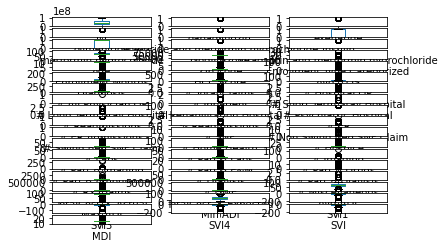

In [14]:
import matplotlib.pyplot as plt

# plot the data
df_final.plot(kind='box', subplots=True, layout=(20,3), sharex=False, sharey=False)
plt.show()



In [15]:
df_final.drop(['Zip Code','MSA','State','Race'],axis=1,inplace=True)

In [16]:
df_final['TotalCost_Y_Actual']=df_final['TotalCost_Y_Actual'].apply(lambda x: 0 if x<1100 else 1)

In [17]:
df_final['TotalCost_Y_Expected']=df_final['TotalCost_Y_Expected'].apply(lambda x: 0 if x<1100 else 1)

In [18]:
df_final.drop(['TotalCost_Y_Expected'],axis=1,inplace=True)

In [19]:
df_final['HCC Score']=df_final['HCC Score'].apply(lambda x: 1 if x>=1 else 0)

In [20]:
df_final['Age']=df_final['Age'].apply(lambda x: 0 if x<64 else 1)

In [21]:
def func(x):
    if x<=3:
        return x
    elif (x>3 and x<=6):
        return 4
    elif (x>6 and x<=13):
        return 5
    else:
        return 7

In [22]:
df_final['Sex']=df_final['Sex'].map({'Male':1,'Female':0})

In [23]:
df_final['Diagnosis']=df_final['Diagnosis'].apply(lambda x : func(x))

In [24]:
#df_final.drop(['Zip Code','MSA','State','Race'],axis=1,inplace=True)

In [25]:
c=list()
for i in df_final.columns:
    if '#' in i:
        c.append(i)

In [26]:
for f in c:
    df_final[f]=df_final[f].apply(lambda x : func(x))

In [27]:
#Select columns which dtype == 'category'
cat_cols = df_final.select_dtypes(include=['int64','float64']).columns
print(f'Numerical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_final[col].mode()[0]
    df_final[col].fillna(fill_value, inplace=True)

Numerical columns: Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'TotalCost_Y_Actual', 'Avg ADI', 'Max ADI', 'Mi

In [28]:
from sklearn.preprocessing import OneHotEncoder
 
#df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select columns which dtype == 'category'
cat_cols = df_final.select_dtypes(include=['object']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_final[col].mean()
    df_final[col].fillna(fill_value, inplace=True)
     
    # create a list of labels to be encoded in the column
    append_to = list(df_final[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df_final[append_to] = OneHotEncoder().fit_transform(df_final[[col]]).toarray()
 
    # Drop non-encoded column
    df_final.drop(col, axis=1, inplace=True)
 
    # Drop redundant data
    df_final.drop(append_to[0], axis=1, inplace=True)

print(df_final.columns)

Categorical columns: Index([], dtype='object')
Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'TotalCost_Y_Actual

In [29]:
df_final['TotalCost_Y_Actual'].value_counts()

1    13379
0     2949
Name: TotalCost_Y_Actual, dtype: int64

<BarContainer object of 2 artists>

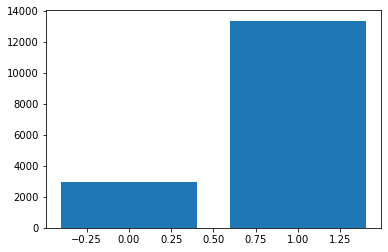

In [30]:
plt.bar(df_final['TotalCost_Y_Actual'].value_counts().index,df_final['TotalCost_Y_Actual'].value_counts().values)

In [31]:
# Split the dataset into features and target variable
X = df_final.drop('TotalCost_Y_Actual', axis=1)
y = df_final['TotalCost_Y_Actual']

# Undersample the majority class
undersampler = RandomOverSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Save the balanced dataset
df_final = pd.concat([X_resampled, y_resampled], axis=1)

<BarContainer object of 2 artists>

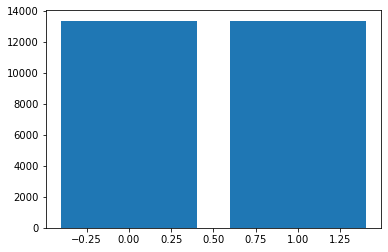

In [32]:
plt.bar(df_final['TotalCost_Y_Actual'].value_counts().index,df_final['TotalCost_Y_Actual'].value_counts().values)

In [33]:
df2 = pd.read_csv('Softec_Patient_Data_Testing_Features.csv')
df7= df.merge(df2, how='inner',on='ID')
df_test=df7.merge(df4, how='inner',on='ID')

In [34]:
df_test.drop(['Zip Code','MSA','State','Race'],axis=1,inplace=True)

In [35]:
c=list()
for i in df_test.columns:
    if '#' in i:
        c.append(i)
for f in c:
    df_test[f]=df_test[f].apply(lambda x : func(x))


In [36]:
df_test['Sex']=df_test['Sex'].map({'Male':1,'Female':0})
df_test['HCC Score']=df_test['HCC Score'].apply(lambda x: 1 if x>=1 else 0)
df_test['Age']=df_test['Age'].apply(lambda x: 0 if x<64 else 1)
df_test['Diagnosis']=df_test['Diagnosis'].apply(lambda x : func(x))


In [37]:
from sklearn.preprocessing import OneHotEncoder
 
#df = fetch_openml('titanic', version=1, as_frame=True)['data']
 
# Select columns which dtype == 'category'
cat_cols = df_test.select_dtypes(include=['object']).columns
print(f'Categorical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_test[col].mode()[0] 
    df_test[col].fillna(fill_value, inplace=True)
     
    # create a list of labels to be encoded in the column
    append_to = list(df_test[col].unique())
 
    # These labels will be use as column headers
    print(append_to)
 
    # Apply OneHotEncoder()
    df_test[append_to] = OneHotEncoder().fit_transform(df_test[[col]]).toarray()
 
    # Drop non-encoded column
    df_test.drop(col, axis=1, inplace=True)
 
    # Drop redundant data
    df_test.drop(append_to[0], axis=1, inplace=True)

print(df_test.columns)

Categorical columns: Index([], dtype='object')
Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI

In [38]:
#Select columns which dtype == 'category'
cat_cols = df_test.select_dtypes(include=['int64','float64']).columns
print(f'Numerical columns: {cat_cols}')
 
# Loop through each categorical column 
for col in cat_cols:
    # Impute missing values
    fill_value = df_test[col].median()
    df_test[col].fillna(fill_value, inplace=True)

Numerical columns: Index(['ID', 'dapagliflozin', 'exenatide', 'glimepiride',
       'glyburide and metformin hydrochloride', 'insulin',
       'metformin hydrochloride', 'pioglitazone',
       'sitagliptin and metformin hydrochloride', 'Age', 'Sex',
       'Enrollment Type Categorized', 'Enrollment Months', 'HCC Score',
       'Avg. LOS', 'Diagnosis', '# Total Claims', '# Hospital OP',
       '# All Physician OP', '# Inpatient', '# Short Term Stay Hospital',
       '# Long Term Stay Hospital', '# Rehabilitation Hospital',
       '# Psychiatric Hospital', '# Readmissions', '% Readmissions', '# ER',
       '# ER Admissions', '# SNF', '# Non Swing Bed SNF Claim',
       '# Swing Bed SNF Claim', '# Home Health', '# Hospice', '# Labs',
       '# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B E&M',
       '# Part B Drugs', '# Part B Ambulance', '# Dialysis',
       '# Part-B Dialysis', '# Rx Claims', '# DME', '# Miscellaneous',
       'Avg ADI', 'Max ADI', 'Min ADI', 'SVI1', 'SVI3'

In [39]:
X,y=df_final.drop(['ID','TotalCost_Y_Actual'],axis=1),df_final['TotalCost_Y_Actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)#,stratify=y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Load your dataset
#X, y = load_dataset()


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#model=KNeighborsClassifier(n_neighbors=3)#,n_features_in_=20)
#model=GaussianNB()
#model =LogisticRegression(random_state=42)#n_estimators=1000, random_state=0)
#model=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=15)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='leaky_relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
optimizer = Adam(lr=0.006)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# train the model on the training data
history = model.fit(X_train, y_train, epochs=300, batch_size=1000,validation_split=0.2,validation_batch_size=100)
        
# predict the labels of the testing data using the trained model

# train the model on the training data
model.fit(X_train, y_train)

# predict the labels of the testing data using the trained model
y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.8).astype(int)
# calculate accuracy and classification report of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

2023-05-07 13:51:33.256901: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300


/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


18/18 [==============================] - 1s 17ms/step - loss: 0.7643 - accuracy: 0.5031 - val_loss: 0.6898 - val_accuracy: 0.5502
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 0.7082 - accuracy: 0.5197 - val_loss: 0.6848 - val_accuracy: 0.6023
Epoch 3/300
18/18 [==============================] - 0s 7ms/step - loss: 0.6910 - accuracy: 0.5343 - val_loss: 0.6724 - val_accuracy: 0.6840
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 0.6764 - accuracy: 0.5745 - val_loss: 0.6359 - val_accuracy: 0.6569
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 0.6439 - accuracy: 0.6374 - val_loss: 0.5934 - val_accuracy: 0.7013
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 0.6160 - accuracy: 0.6779 - val_loss: 0.5813 - val_accuracy: 0.7095
Epoch 7/300
18/18 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.6924 - val_loss: 0.5726 - val_accuracy: 0.7158
Epoch 8/300
18/18 [=====

Epoch 59/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5437 - accuracy: 0.7328 - val_loss: 0.5254 - val_accuracy: 0.7370
Epoch 60/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.7299 - val_loss: 0.5260 - val_accuracy: 0.7391
Epoch 61/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5457 - accuracy: 0.7310 - val_loss: 0.5334 - val_accuracy: 0.7305
Epoch 62/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5477 - accuracy: 0.7335 - val_loss: 0.5252 - val_accuracy: 0.7356
Epoch 63/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5481 - accuracy: 0.7315 - val_loss: 0.5255 - val_accuracy: 0.7363
Epoch 64/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5450 - accuracy: 0.7312 - val_loss: 0.5248 - val_accuracy: 0.7375
Epoch 65/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5501 - accuracy: 0.7310 - val_loss: 0.5327 - val_accuracy: 0.7328
Epoch 

18/18 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 0.7322 - val_loss: 0.5187 - val_accuracy: 0.7431
Epoch 117/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5432 - accuracy: 0.7361 - val_loss: 0.5224 - val_accuracy: 0.7382
Epoch 118/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.7362 - val_loss: 0.5275 - val_accuracy: 0.7356
Epoch 119/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7328 - val_loss: 0.5204 - val_accuracy: 0.7394
Epoch 120/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5435 - accuracy: 0.7333 - val_loss: 0.5260 - val_accuracy: 0.7333
Epoch 121/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5390 - accuracy: 0.7364 - val_loss: 0.5225 - val_accuracy: 0.7394
Epoch 122/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5381 - accuracy: 0.7369 - val_loss: 0.5215 - val_accuracy: 0.7389
Epoch 123/300

18/18 [==============================] - 0s 6ms/step - loss: 0.5357 - accuracy: 0.7394 - val_loss: 0.5177 - val_accuracy: 0.7429
Epoch 174/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5379 - accuracy: 0.7360 - val_loss: 0.5213 - val_accuracy: 0.7368
Epoch 175/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.7360 - val_loss: 0.5197 - val_accuracy: 0.7398
Epoch 176/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5372 - accuracy: 0.7358 - val_loss: 0.5196 - val_accuracy: 0.7424
Epoch 177/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5380 - accuracy: 0.7373 - val_loss: 0.5192 - val_accuracy: 0.7401
Epoch 178/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5383 - accuracy: 0.7353 - val_loss: 0.5170 - val_accuracy: 0.7471
Epoch 179/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5332 - accuracy: 0.7373 - val_loss: 0.5198 - val_accuracy: 0.7324
Epoch 180/300

18/18 [==============================] - 0s 6ms/step - loss: 0.5396 - accuracy: 0.7334 - val_loss: 0.5237 - val_accuracy: 0.7405
Epoch 231/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5387 - accuracy: 0.7384 - val_loss: 0.5192 - val_accuracy: 0.7410
Epoch 232/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5375 - accuracy: 0.7374 - val_loss: 0.5184 - val_accuracy: 0.7424
Epoch 233/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5376 - accuracy: 0.7363 - val_loss: 0.5168 - val_accuracy: 0.7408
Epoch 234/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5353 - accuracy: 0.7382 - val_loss: 0.5173 - val_accuracy: 0.7436
Epoch 235/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5340 - accuracy: 0.7384 - val_loss: 0.5167 - val_accuracy: 0.7436
Epoch 236/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5333 - accuracy: 0.7391 - val_loss: 0.5155 - val_accuracy: 0.7438
Epoch 237/300

18/18 [==============================] - 0s 6ms/step - loss: 0.5332 - accuracy: 0.7389 - val_loss: 0.5153 - val_accuracy: 0.7396
Epoch 288/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5329 - accuracy: 0.7396 - val_loss: 0.5148 - val_accuracy: 0.7394
Epoch 289/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5315 - accuracy: 0.7385 - val_loss: 0.5147 - val_accuracy: 0.7405
Epoch 290/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5306 - accuracy: 0.7401 - val_loss: 0.5245 - val_accuracy: 0.7368
Epoch 291/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7359 - val_loss: 0.5195 - val_accuracy: 0.7377
Epoch 292/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5349 - accuracy: 0.7356 - val_loss: 0.5154 - val_accuracy: 0.7398
Epoch 293/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5340 - accuracy: 0.7351 - val_loss: 0.5168 - val_accuracy: 0.7415
Epoch 294/300

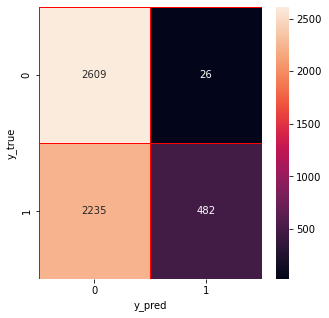

In [41]:
cm= confusion_matrix(y_test,y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [42]:
df_test

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,# DME,# Miscellaneous,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI
0,31892017,0,0,0,0,1,0,0,0,1,...,0,0,51.812500,88.0,35.0,0.520989,0.158867,0.426078,0.414422,14.16
1,88982019,0,0,0,0,0,1,0,0,1,...,0,0,69.000000,84.0,52.0,0.520989,0.158867,0.426078,0.414422,14.16
2,77642018,0,1,0,0,0,1,0,0,1,...,5,0,82.833333,94.0,66.0,0.568536,0.120555,0.512073,0.508173,14.16
3,45942018,0,0,0,0,1,1,0,0,1,...,7,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,14.16
4,73102017,0,0,1,0,1,1,0,0,1,...,7,0,75.578947,95.0,47.0,0.648162,0.094200,0.510750,0.554400,14.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,26212020,0,0,0,0,1,0,0,0,0,...,4,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,15.39
4080,42272018,0,0,0,0,1,0,0,0,0,...,0,0,83.888889,97.0,58.0,-35.236656,-23.311688,-94.646452,-94.703669,15.39
4081,78372017,0,0,0,0,1,1,0,0,0,...,7,0,61.833333,90.0,45.0,0.233687,0.196252,0.383752,0.252361,14.16
4082,55082018,0,0,1,0,0,0,0,0,1,...,0,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,14.16


In [43]:
X_t=df_test.drop(['ID'],axis=1)

In [44]:
#predicted = model.predict(X_t)
predicted = (model.predict(X_t) > 0.8).astype(int)

128/128 [==============================] - 0s 880us/step


In [45]:
df_test['Prediction']=predicted

In [46]:
df_test['Prediction'].value_counts()

1    2149
0    1935
Name: Prediction, dtype: int64

In [47]:
df_test

,ID,dapagliflozin,exenatide,glimepiride,glyburide and metformin hydrochloride,insulin,metformin hydrochloride,pioglitazone,sitagliptin and metformin hydrochloride,Age,...,# Miscellaneous,Avg ADI,Max ADI,Min ADI,SVI1,SVI3,SVI4,SVI,MDI,Prediction
0,31892017,0,0,0,0,1,0,0,0,1,...,0,51.812500,88.0,35.0,0.520989,0.158867,0.426078,0.414422,14.16,0
1,88982019,0,0,0,0,0,1,0,0,1,...,0,69.000000,84.0,52.0,0.520989,0.158867,0.426078,0.414422,14.16,0
2,77642018,0,1,0,0,0,1,0,0,1,...,0,82.833333,94.0,66.0,0.568536,0.120555,0.512073,0.508173,14.16,0
3,45942018,0,0,0,0,1,1,0,0,1,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,14.16,0
4,73102017,0,0,1,0,1,1,0,0,1,...,0,75.578947,95.0,47.0,0.648162,0.094200,0.510750,0.554400,14.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,26212020,0,0,0,0,1,0,0,0,0,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,15.39,1
4080,42272018,0,0,0,0,1,0,0,0,0,...,0,83.888889,97.0,58.0,-35.236656,-23.311688,-94.646452,-94.703669,15.39,0
4081,78372017,0,0,0,0,1,1,0,0,0,...,0,61.833333,90.0,45.0,0.233687,0.196252,0.383752,0.252361,14.16,0
4082,55082018,0,0,1,0,0,0,0,0,1,...,0,75.333333,96.0,38.0,0.281248,0.281334,0.508021,0.375466,14.16,0


In [48]:
df_test[['ID','Prediction']].to_csv('AIC_NN2.csv',index=False)

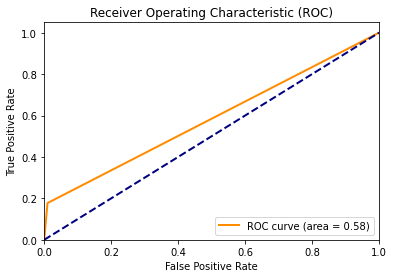

In [49]:
# Assuming y_pred and y_true are arrays containing the predicted and true target variable values for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [50]:
df_n=pd.read_csv('AIC_zain.csv')

In [51]:
df_test['Prediction'].min()

0

In [52]:
df_n['Prediction'].value_counts()

0    3238
1     846
Name: Prediction, dtype: int64

In [53]:
(df_test['Prediction']==df_n['Prediction']).sum()

2011

# THE END